In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('/Users/zhusijie/Desktop/R/R project/jobs_in_data.csv')

In [4]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# check number of rows and columns
df.shape

(9355, 12)

In [6]:
# check basic information, data type, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
# remove unrelated columns
df.drop(columns = ['salary_currency','salary']).head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [8]:
# describe non numerical columns
df.describe(exclude = np.number)

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


In [9]:
pd.DataFrame({'Row_num':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'factor':df.nunique()
})

,Row_num,Null,Null %,factor
work_year,9355,0,0.0,4
job_title,9355,0,0.0,125
job_category,9355,0,0.0,10
salary_currency,9355,0,0.0,11
salary,9355,0,0.0,1507
salary_in_usd,9355,0,0.0,1786
employee_residence,9355,0,0.0,83
experience_level,9355,0,0.0,4
employment_type,9355,0,0.0,4
work_setting,9355,0,0.0,3


/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


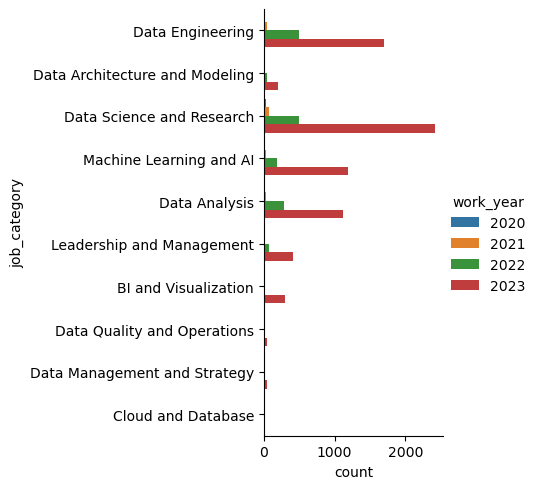

In [10]:
# job numbers according to job catogory and year
sns.catplot(data=df, y='job_category', kind='count', hue = 'work_year')
plt.show()

/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



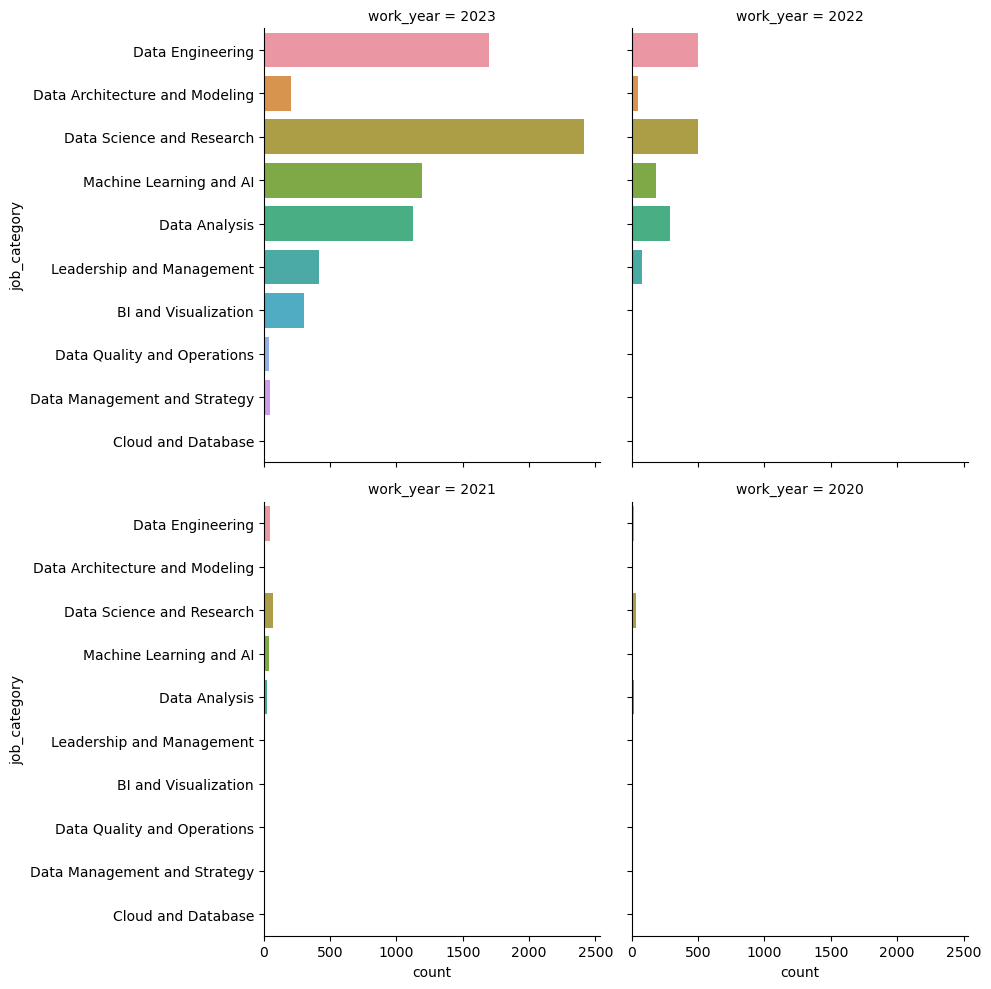

In [57]:
fig = sns.catplot(data=df, y='job_category', kind='count', col = 'work_year', col_wrap = 2, col_order = [2023,2022,2021,2020])
plt.show()

In [11]:
# different jobs in each category
df.groupby(['job_category', 'job_title']).size().reset_index(name='job_num')

,job_category,job_title,job_num
0,BI and Visualization,BI Analyst,29
1,BI and Visualization,BI Developer,52
2,BI and Visualization,Business Intelligence Analyst,54
3,BI and Visualization,Business Intelligence Developer,17
4,BI and Visualization,Business Intelligence Engineer,144
...,...,...,...
120,Machine Learning and AI,Machine Learning Software Engineer,13
121,Machine Learning and AI,Machine Learning Specialist,2
122,Machine Learning and AI,NLP Engineer,12
123,Machine Learning and AI,Principal Machine Learning Engineer,3


In [12]:
# salary for different jobs
a = df.groupby('job_title')['salary_in_usd'].mean().round()\
.reset_index(name='salary').sort_values(by= 'salary',ascending = False).head(10)
a

,job_title,salary
8,Analytics Engineering Manager,399880.0
68,Data Science Tech Lead,375000.0
107,Managing Director Data Science,300000.0
87,Head of Machine Learning,259000.0
6,AWS Data Architect,258000.0
0,AI Architect,250328.0
28,Cloud Data Architect,250000.0
80,Director of Data Science,221365.0
104,Machine Learning Software Engineer,212908.0
85,Head of Data,211187.0


/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


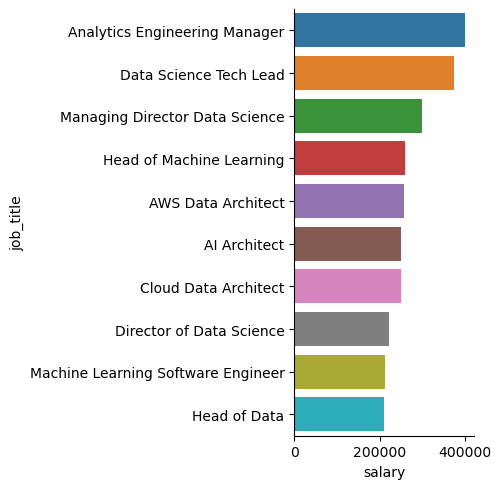

In [13]:
sns.catplot(data=a, y='job_title', x='salary', kind='bar')

In [28]:
# experience level's impact to job numbers and avarage salary
experience = df.groupby('experience_level').agg({'job_title':'count', 'salary_in_usd':'mean'})\
.round().rename(columns = {'job_title':'job numbers', 'salary_in_usd':'average salary'})
experience.reset_index(inplace = True)

,experience_level,job numbers,average salary
0,Entry-level,496,88535.0
1,Executive,281,189463.0
2,Mid-level,1869,117524.0
3,Senior,6709,162356.0


In [20]:
import plotly.express as px

In [29]:
# job numbers for different experience level
fig = px.pie(experience, values='job numbers', names='experience_level', color='experience_level',
             color_discrete_map={'Entry-level':'lightcyan',
                                 'Executive':'cyan',
                                 'Mid-level':'royalblue',
                                 'Senior':'darkblue'})
fig.show()

/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



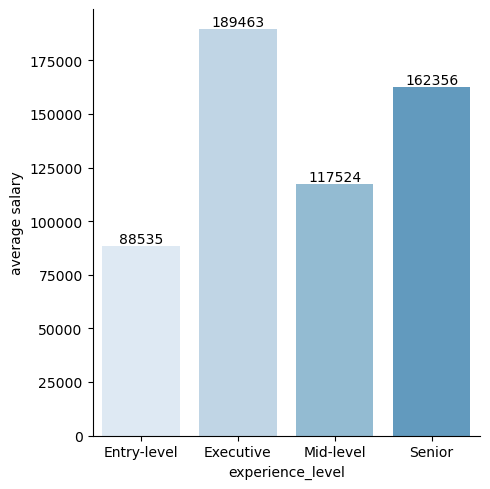

In [52]:
# salary for different experience level
grid0 = sns.catplot(data= experience, x='experience_level', y='average salary', kind = 'bar')
ax = grid0.axes[0, 0]
ax.bar_label(ax.containers[0])
sns.set_palette('Blues')

In [17]:
# salary difference according to countries
b = df.groupby('employee_residence')['salary_in_usd'].mean().round().sort_values(ascending =False).head(15).reset_index(name='salary')
b

,employee_residence,salary
0,Qatar,300000.0
1,Malaysia,200000.0
2,Puerto Rico,166000.0
3,United States,158586.0
4,Canada,144743.0
5,Australia,138639.0
6,Japan,135500.0
7,Saudi Arabia,134999.0
8,China,125404.0
9,New Zealand,125000.0


/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



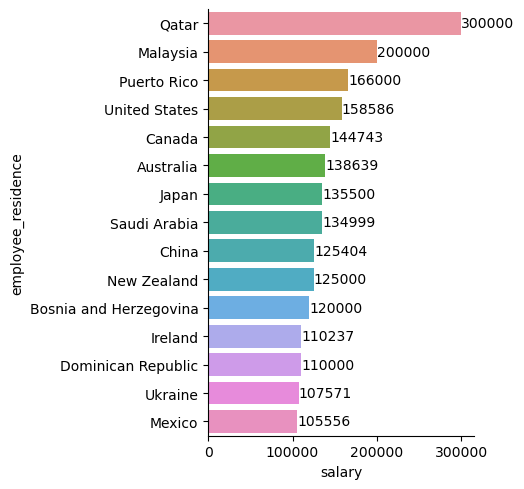

In [51]:
grid1 = sns.catplot(data=b, y='employee_residence', x='salary', kind= 'bar')
ax = grid1.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.show()

In [44]:
# job numbers according to different countries
nb_job_country = df.groupby('employee_residence').size().sort_values(ascending = False).head(15).reset_index(name = 'nb_jobs')
nb_job_country

,employee_residence,nb_jobs
0,United States,8086
1,United Kingdom,442
2,Canada,224
3,Spain,117
4,Germany,66
5,France,54
6,Portugal,26
7,Australia,21
8,Netherlands,21
9,Italy,20


/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



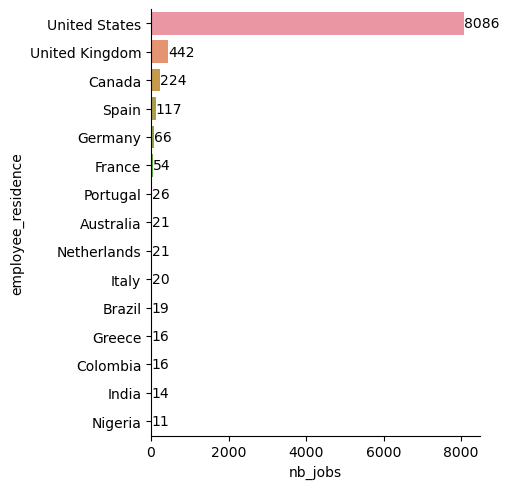

In [50]:
grid2 = sns.catplot(data= nb_job_country, y='employee_residence', x='nb_jobs', kind= 'bar')
ax = grid2.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.show()